# Trementum Test Task - Ihor Lukianov - 26-03-2022

## Packages and overview

In [1]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
# import data from excel file
df = pd.read_excel("Analytics Test Task - Trementum.xlsx",sheet_name="Dataset",index_col=0)

In [3]:
# quick overview of the dataset
df.head()

,gender,last_connection,x1,x2,x3,t1,t2
ids,,,,,,,
1,F,2015-04-27,37.796189,292.189338,85.871732,1102.896732,1814.852022
2,M,2015-04-27,44.523437,294.989423,96.432040,1116.845895,1679.957691
3,F,2015-02-16,90.593723,298.219531,96.915476,1290.882244,1841.987889
4,M,2015-04-18,44.055440,303.041350,96.422230,1173.231390,1712.165400
5,F,2015-03-08,9.753165,298.005909,95.192099,1036.007131,1841.026590


In [4]:
df.describe()

,x1,x2,x3,t1,t2
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.067047,300.068631,95.055902,1174.859697,1769.174820
std,28.931639,9.889459,9.911644,118.724074,86.214259
min,0.004004,264.463035,62.029833,897.883743,1557.852139
25%,24.719006,293.396488,92.997142,1084.746402,1696.077169
50%,49.876050,300.225596,95.889497,1175.567545,1752.607393
75%,75.389142,306.557144,97.995304,1264.322678,1846.609079
max,99.904798,339.416551,1000.000000,1449.617809,2027.374480


Find if there are any **nulls** in the data frame.

In [5]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
last_connection,100,0.01
gender,0,0.00
x1,0,0.00
x2,0,0.00
x3,0,0.00
t1,0,0.00
t2,0,0.00


Some missing values are in the **last_connection** category. I'll pay attention to it in the relevant section.

## Step1: Describe each category

_Step 1
Field types_

_Please describe the fields gender, last_connection, x1, x2 & x3 independently from any other fields._

_You do not need to write full sentences, but your answer should cover the following questions:_
- What kind of data is in the field?
- Is the data complete?
- Does it all look fine?
- Are there obvious patterns in the data?

_(Don't spend more than 10 minutes per field)_

### Gender

The first column - **gender**, contains only two values - **male(M)** and **female(F)**.

Text(0.5, 1.0, 'Gender')

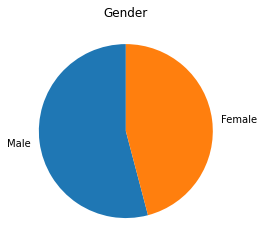

In [6]:
plt.pie(df['gender'].value_counts(),labels=['Male','Female'],startangle=90)
plt.title('Gender')

In [7]:
df["gender"].value_counts()

M    5410
F    4590
Name: gender, dtype: int64

Everything looks fine here. The data contains all 10000 values, there are slightly more male connections than female, but the balance is normal.

### Last Connection

Second column - last_connection with dates.
First of all, there are only 9900 values. So, we don't know the information for 100 values.

In [8]:
df["last_connection"].count()

9900

In [9]:
# create a dataframe for all missing values
dfNoDate = df[df['last_connection'].isna() == True]
dfNoDate.head()

,gender,last_connection,x1,x2,x3,t1,t2
ids,,,,,,,
72,F,NaT,94.193060,296.728093,96.624358,1390.429021,1835.276418
201,F,NaT,14.513138,297.742944,93.439564,998.956686,1839.843246
231,M,NaT,78.566415,286.127010,97.942381,1275.986271,1644.508038
667,M,NaT,86.706631,298.665773,96.278532,1246.407489,1694.663093
718,M,NaT,33.657190,300.989347,96.639078,1212.422614,1703.957389


In [10]:
dfNoDate['gender'].value_counts()

M    58
F    42
Name: gender, dtype: int64

According to the results, this information is simply missing from the data. The best decision  is to make further investigation on the root of this problem. As for the current task, we can just delete these values from our dataset. We can exclude up to 5% of data still to have good research. Our missing data is just 1%.

In [11]:
df = df[df['last_connection'].isna() == False]

In [12]:
df.describe()

,x1,x2,x3,t1,t2
count,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000
mean,50.074626,300.065249,95.059389,1174.873047,1769.220700
std,28.926705,9.878200,9.951427,118.637538,86.215166
min,0.004004,264.463035,62.029833,897.883743,1557.852139
25%,24.719006,293.397245,92.996984,1084.938311,1696.160393
50%,49.869093,300.223222,95.893075,1175.500124,1752.584470
75%,75.378214,306.542491,97.994288,1264.264403,1846.673508
max,99.904798,339.416551,1000.000000,1449.617809,2027.374480


In [13]:
df.sort_values(by='last_connection')

,gender,last_connection,x1,x2,x3,t1,t2
ids,,,,,,,
4997,M,2015-01-31,95.266111,300.086481,97.105300,1229.848477,1700.345924
3277,F,2015-01-31,11.421857,315.311323,96.033644,984.792560,1918.900954
2706,M,2015-01-31,91.303795,290.372681,90.893020,1337.735450,1661.490722
210,M,2015-01-31,27.326659,291.908337,99.963776,1038.541277,1667.633349
7769,F,2015-01-31,5.340187,304.524024,94.290626,986.415864,1870.358109
...,...,...,...,...,...,...,...
3114,F,2015-05-10,61.872095,288.909572,89.588931,1227.084921,1800.093074
7539,F,2015-05-10,4.723329,297.134979,97.074443,1094.786799,1837.107407
3954,F,2015-05-10,41.377053,294.424879,96.840659,1204.394810,1824.911955


As we can see, our data was collected between January 31, 2015 and May 10, 2015.

### x1

From the description of this column, it is clear that the values are in the range from 0 to 100 and the average almost in the middle (50).

In [16]:
df['x1'].describe()

count    9900.000000
mean       50.074626
std        28.926705
min         0.004004
25%        24.719006
50%        49.869093
75%        75.378214
max        99.904798
Name: x1, dtype: float64

The distribution shows us that values are equally distributed in this range.

Text(0.5, 1.0, 'x1')

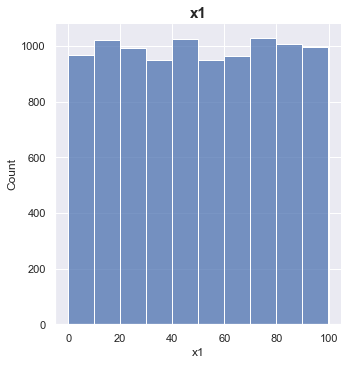

In [17]:
#count by groups of each 10% usiing distripution
sns.set_theme()
sns.displot(data = df,x='x1',bins=10)
plt.title('x1', fontdict={'weight':'bold','size': 15})

### x2

This data is normally distributed and doesn't have any missing values. 

In [18]:
df['x2'].describe()

count    9900.000000
mean      300.065249
std         9.878200
min       264.463035
25%       293.397245
50%       300.223222
75%       306.542491
max       339.416551
Name: x2, dtype: float64

Text(0.5, 1.0, 'x2')

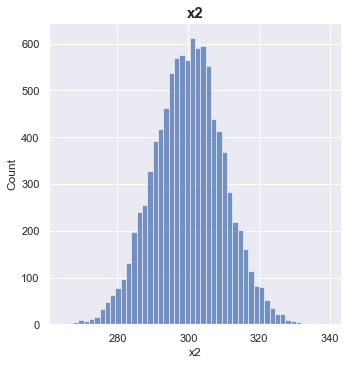

In [19]:
sns.displot(data = df,x='x2',bins=50)
plt.title('x2',fontdict={'weight':'bold','size': 15})

### x3

From the description, we see the maximum value - 1000, while the mean of the category is 95. Something is wrong with it.

In [20]:
df['x3'].describe()

count    9900.000000
mean       95.059389
std         9.951427
min        62.029833
25%        92.996984
50%        95.893075
75%        97.994288
max      1000.000000
Name: x3, dtype: float64

In [21]:
df[df['x3']==1000]

,gender,last_connection,x1,x2,x3,t1,t2
ids,,,,,,,
5047,F,2015-03-13,1.753303,309.768426,1000.0,917.235502,1893.957918


It seems to be some type of error, like a misprint. There are two possible ways to fix this problem - either to drop this value from our data frame or give it an average value in the x3 category. As for this case, I gonna change it with the mean value.

In [22]:
df.loc[df['x3'] == 1000, 'x3'] = df['x3'].mean()

In [23]:
# check the result
df.loc[5047]

gender                               F
last_connection    2015-03-13 00:00:00
x1                            1.753303
x2                          309.768426
x3                           95.059389
t1                          917.235502
t2                         1893.957918
Name: 5047, dtype: object

In [24]:
df['x3'].describe()

count    9900.000000
mean       94.967981
std         4.036736
min        62.029833
25%        92.996984
50%        95.892884
75%        97.993536
max        99.999098
Name: x3, dtype: float64

Now the data is clear.

Text(0.5, 1.0, 'x3')

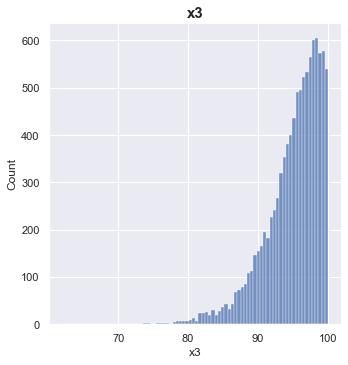

In [25]:
sns.displot(data = df,x='x3')
plt.title('x3',fontdict={'weight':'bold','size': 15})

The distribution plot shows, that the range of values is between 60 and 100.

# Correlation analysis

_Step 2_

_Finding correlations / modeling_

_Legend: The team sending us the data believe that there might be some correlations in the data. They tell us that t1 and t2 are collected one month after x1, x2 and x3._

_They believe t1 and t2 could somehow be predicted in advance.
How would you go about testing this?
Can you make your findings obvious to someone who thinks they don't "get maths”?_

First of all, I'm using pairplot to see a visualization of all relations between numeric values.

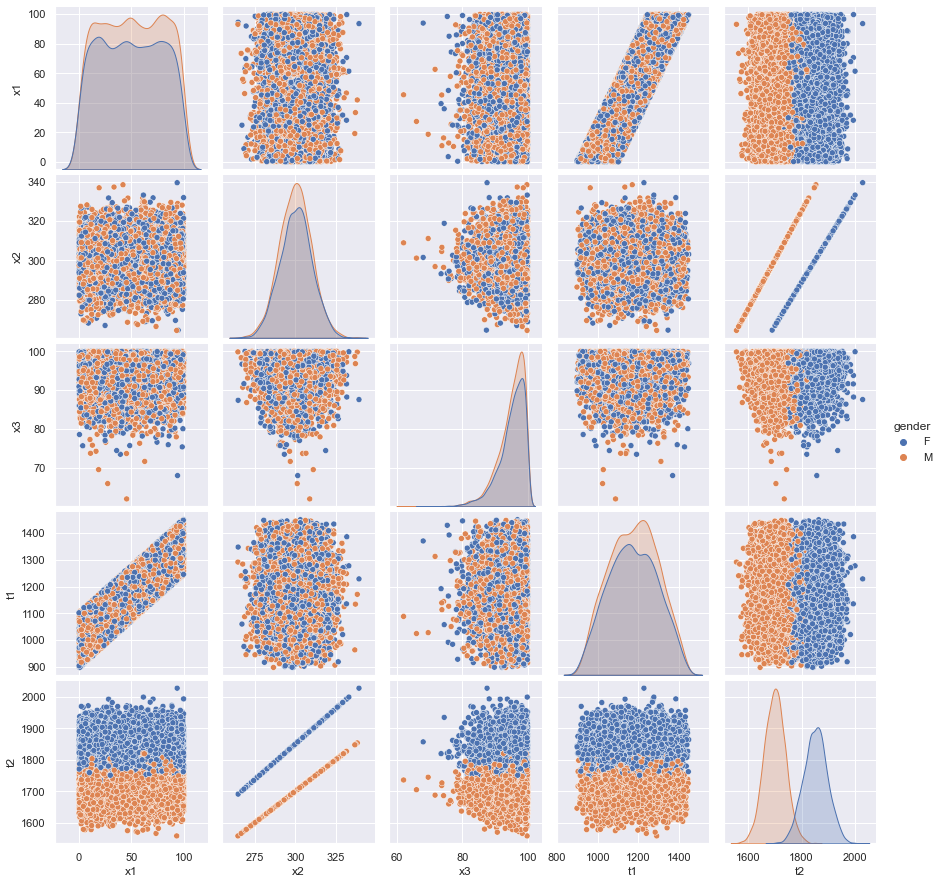

In [26]:
sns.pairplot(df,hue = 'gender')

As a result of this visualization, it's easy to notice a strong correlation in pairs **x1-t1** and **x2-t2**.

Now we can find all correlations in this dataframe. I also want to check the correlation between gender and out **t1** and **t2** values. For this perpose use dummy varaibles.

In [27]:
df['ifMale'] = pd.get_dummies(data=df.gender,drop_first=True)

In [28]:
corr = df.corr()
corr

,x1,x2,x3,t1,t2,ifMale
x1,1.000000,-0.005280,0.022564,0.860219,-0.024075,0.024421
x2,-0.005280,1.000000,-0.004348,0.003250,0.497048,-0.014475
x3,0.022564,-0.004348,1.000000,0.018200,0.002121,-0.004531
t1,0.860219,0.003250,0.018200,1.000000,-0.013454,0.016744
t2,-0.024075,0.497048,0.002121,-0.013454,1.000000,-0.874358
ifMale,0.024421,-0.014475,-0.004531,0.016744,-0.874358,1.000000


<AxesSubplot:>

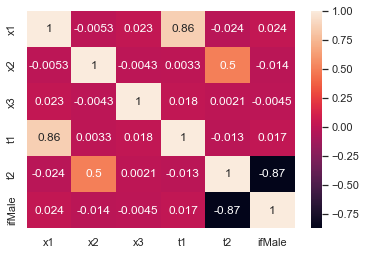

In [29]:
sns.heatmap(corr,annot=True)

From the heatmap, we can notice a strong correlation in pairs **x1-t1**, **x2-t2**, and **gender-t2**.

In [30]:
#drop column ifMale
df.drop('ifMale',axis=1,inplace=True)

In [31]:
#make dataframes for male and female values only
df_M = df[df['gender']=='M']
df_F = df[df['gender']=='F']

In [32]:
#correlatios in these dataframes
df_M.corr()

,x1,x2,x3,t1,t2
x1,1.000000,0.005856,0.031551,0.859610,0.005856
x2,0.005856,1.000000,-0.013980,0.019841,1.000000
x3,0.031551,-0.013980,1.000000,0.025274,-0.013980
t1,0.859610,0.019841,0.025274,1.000000,0.019841
t2,0.005856,1.000000,-0.013980,0.019841,1.000000


In [33]:
df_F.corr()

,x1,x2,x3,t1,t2
x1,1.000000,-0.017736,0.012134,0.860884,-0.017736
x2,-0.017736,1.000000,0.006960,-0.015754,1.000000
x3,0.012134,0.006960,1.000000,0.010032,0.006960
t1,0.860884,-0.015754,0.010032,1.000000,-0.015754
t2,-0.017736,1.000000,0.006960,-0.015754,1.000000


**We found a perfect positive correlation between x2 and t2**

Now we can find linear regression equations.

Text(0.5, 1.0, 'Linear Regression - Male x2-t2')

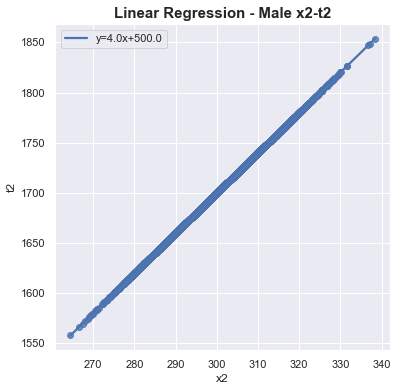

In [34]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_M ['x2'],df_M['t2'])
# line label for legend
plt.figure(figsize=(6,6))
ax = sns.regplot(x="x2", y="t2", data=df_M, color='b', 
line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.title('Linear Regression - Male x2-t2', fontdict={'weight':'bold','size': 15})

Text(0.5, 1.0, 'Linear Regression - Female x2-t2')

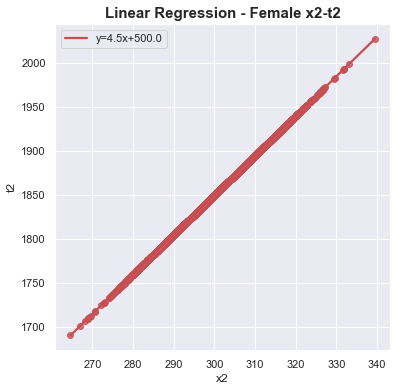

In [35]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_F ['x2'],df_F['t2'])
plt.figure(figsize=(6,6))
ax = sns.regplot(x="x2", y="t2", data=df_F, color='r', 
line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.title('Linear Regression - Female x2-t2', fontdict={'weight':'bold','size': 15})

x1 and t1 also have strong positive correlation - **0.86**.  

Text(0.5, 1.0, 'Linear Regression - x1-t1')

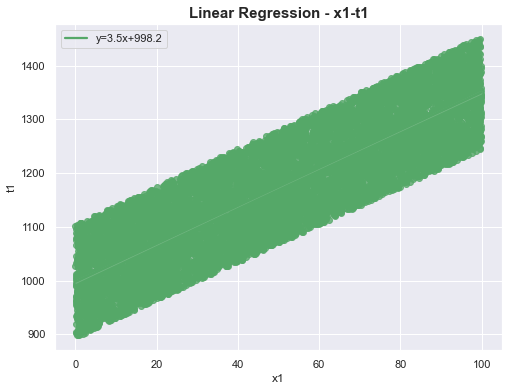

In [36]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df ['x1'],df['t1'])
plt.figure(figsize=(8,6))
ax = sns.regplot(x="x1", y="t1", data=df, color='g', 
line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.title('Linear Regression - x1-t1', fontdict={'weight':'bold','size': 15})

For all these equation there are explanations:
- x1-t1 (t1=3.5*x1 + 998.2) - every increase of x1 by 1 results in the increase of t1 by 3.5
- x2-t2 Male (t2=4.0*x2 + 500) - every increse of x2 by 1 results in the increase of t2 by 4
- x2-t2 Female (t2=4.5*x2 + 500) - every increse of x2 by 1 results in the increase of t2 by 4.5

**We can use these equations to predict future values of t1 and t2.**